# Arv Decisao

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('/Users/vivianmedina/Downloads/heart.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [43]:

X_treino, X_teste, y_treino, y_teste = train_test_split(df[['Cholesterol','MaxHR']],df['HeartDisease'],test_size=0.2)
arv = DecisionTreeClassifier(max_depth=3)
arv.fit(X_treino,y_treino)
acuracia_treino = arv.score(X_treino,y_treino)
acuracia_treino*100

70.84468664850137

In [15]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(arv,filled=True,
                           feature_names=['Cholesterol','MaxHR'], 
                           class_names=['Not Heart Disease','Heart Disease'])
grafico = Source(dot_data)
grafico


# H2O

In [45]:
!pip install h2o

zsh:1: command not found: pip


In [46]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "18.0.1.1" 2022-04-22; Java(TM) SE Runtime Environment (build 18.0.1.1+2-6); Java HotSpot(TM) 64-Bit Server VM (build 18.0.1.1+2-6, mixed mode, sharing)
  Starting server from /Users/vivianmedina/Library/Python/3.8/lib/python/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/64/lkwh0p2s2vg5v8d2tdgz5ltm0000gn/T/tmpogbwsh9v
  JVM stdout: /var/folders/64/lkwh0p2s2vg5v8d2tdgz5ltm0000gn/T/tmpogbwsh9v/h2o_vivianmedina_started_from_python.out
  JVM stderr: /var/folders/64/lkwh0p2s2vg5v8d2tdgz5ltm0000gn/T/tmpogbwsh9v/h2o_vivianmedina_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_vivianmedina_uzxoxs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


![](https://miro.medium.com/max/1400/1*hmtbIgxoflflJqMJ_UHwXw.jpeg)

In [47]:
from h2o.estimators import H2ORandomForestEstimator
dados = h2o.import_file('/Users/vivianmedina/Downloads/heart.csv')
dados['HeartDisease'] = dados['HeartDisease'].asfactor()
treino, teste = dados.split_frame(ratios=[0.8])
tree =H2ORandomForestEstimator(max_depth=3)
tree.train(['Cholesterol','MaxHR'],'HeartDisease',treino)
tree.model_performance(teste) 


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.19636314868455942
RMSE: 0.44312881725809644
LogLoss: 0.5794671349352659
Mean Per-Class Error: 0.335973955507325
AUC: 0.7789473684210526
AUCPR: 0.7804406594946213
Gini: 0.5578947368421052

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36826948821544647
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      39   56   0.5895   (56.0/95.0)
1      8    89   0.0825   (8.0/97.0)
Total  47   145  0.3333   (64.0/192.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.368269     0.735537  107
max f2                       0.325499     0.850091  120
max f0point5                 0.468261     0.745921  60
max accuracy                 0.468261     0.729167  60
max precision                0.918182     1         0
max recall                   0.204135     1         149
max specificity              0.918182     1         0
max absolute_mcc             0.468261     0.464043  60
max min_per_class_accuracy   0.432413     0.71134   69
max mean_per_class_accuracy  0.468261     0.729897  60
max tns                      0.918182     95        0
max fns                      0.918182     94        0
max fps                      0.211515     95        148
max tps                      0.204135     97        149
max tnr                      0.918182     1         0
max fnr                      0.918182     0.969072  0
max fpr                      0.211515     1         148
max tpr                      0.204135     1         149

Gains/Lift Table: Avg response rate: 50.52 %, avg score: 52.13 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.015625                    0.918182           1.97938   1.97938            1                0.918182  1                           0.918182            0.0309278       0.0309278                  97.9381   97.9381            0.0309278
2        0.0416667                   0.913143           1.58351   1.73196            0.8              0.913143  0.875                       0.915033            0.0412371       0.0721649                  58.3505   73.1959            0.0616386
3        0.0416667                   0.911443           0         1.73196            0                0         0.875                       0.915033            0               0.0721649                  -100      73.1959            0.0616386
4        0.0572917                   0.910487           1.97938   1.79944            1                0.910487  0.909091                    0.913793            0.0309278       0.103093                   97.9381   79.9438            0.0925665
5        0.109375                    0.882738           1.58351   1.69661            0.8              0.900397  0.857143                    0.907414            0.0824742       0.185567                   58.3505   69.6613            0.153988
6        0.151042                    0.774773           1.73196   1.70636            0.875            0.815723  0.862069                    0.88212             0.0721649       0.257732                   73.1959   70.6363            0.215627
7        0.203125                    0.695043           1.97938   1.77637            1                0.712204  0.897436                    0.838552            0.103093        0.360825                   97.9381   77.6368            0.318719
8        0.302083                    0.658161           1.250

![](https://developers.google.com/static/machine-learning/crash-course/images/AUC.svg)

## Crossvalidation

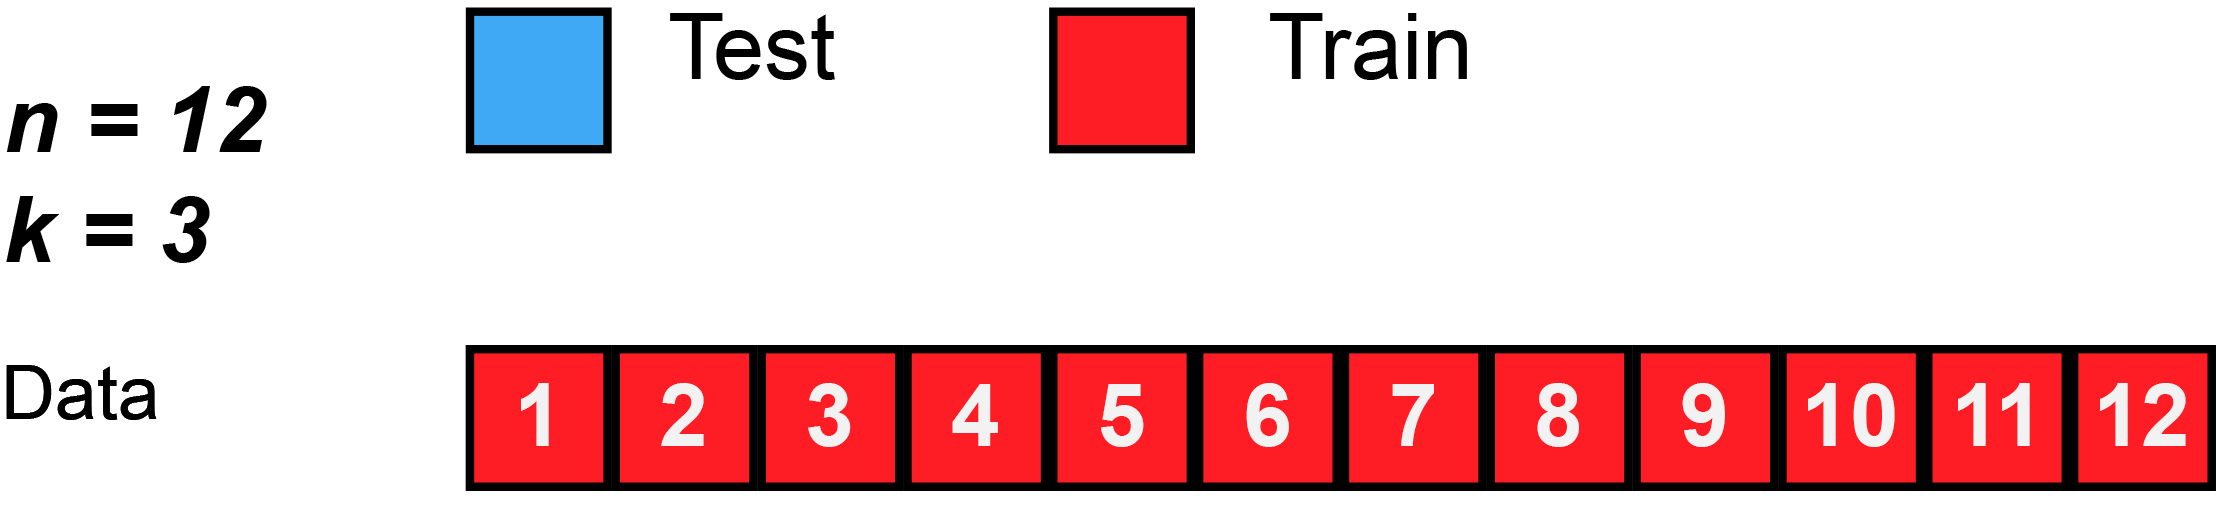

In [48]:
from h2o.estimators import H2ORandomForestEstimator
dados = h2o.import_file('/Users/vivianmedina/Downloads/heart.csv')
dados['HeartDisease'] = dados['HeartDisease'].asfactor()
tree =H2ORandomForestEstimator(nfolds = 5)
tree.train(['Cholesterol','MaxHR'],'HeartDisease',dados)
tree.model_performance() 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.22223795247927025
RMSE: 0.47142120495292766
LogLoss: 1.189031755409206
Mean Per-Class Error: 0.3014211638179374
AUC: 0.7236052429421932
AUCPR: 0.7119648019803915
Gini: 0.4472104858843864

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42368743533179876
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      250  160  0.3902   (160.0/410.0)
1      108  400  0.2126   (108.0/508.0)
Total  358  560  0.2919   (268.0/918.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.423687     0.749064  241
max f2                       0            0.861017  399
max f0point5                 0.456331     0.729323  231
max accuracy                 0.433333     0.708061  238
max precision                0.906181     0.772414  53
max recall                   0            1         399
max specificity              1            0.982927  0
max absolute_mcc             0.433333     0.405062  238
max min_per_class_accuracy   0.54902      0.685366  201
max mean_per_class_accuracy  0.433333     0.699285  238
max tns                      1            403       0
max fns                      1            498       0
max fps                      0            410       399
max tps                      0            508       399
max tnr                      1            0.982927  0
max fnr                      1            0.980315  0
max fpr                      0            1         399
max tpr                      0            1         399

Gains/Lift Table: Avg response rate: 55.34 %, avg score: 54.35 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0185185                   1                  1.06299   1.06299            0.588235         1          0.588235                    1                   0.019685        0.019685                   6.29921   6.29921            0.00261187
2        0.0206972                   0.984449           0.903543  1.04621            0.5              0.98646    0.578947                    0.998575            0.0019685       0.0216535                  -9.64567  4.6208             0.00214135
3        0.0305011                   0.967469           1.20472   1.09716            0.666667         0.975508   0.607143                    0.99116             0.011811        0.0334646                  20.4724   9.71597            0.0066353
4        0.040305                    0.959725           1.20472   1.12332            0.666667         0.962733   0.621622                    0.984246            0.011811        0.0452756                  20.4724   12.3324            0.0111292
5        0.0501089                   0.951276           1.40551   1.17853            0.777778         0.9559     0.652174                    0.9787              0.0137795       0.0590551                  40.5512   17.8535            0.0200307
6        0.101307                    0.928571           1.4995    1.34074            0.829787         0.938025   0.741935                    0.958144            0.0767717       0.135827                   49.9497   34.0742            0.0772902
7        0.150327                    0.90919            1.48583   1.38805            0.822222         0.918275   0.768116                    0.945143            0.0728346       0.208661                   48.5827   38.8052            0.130613
8        0.200436                 

In [49]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator
dados = h2o.import_file('/Users/vivianmedina/Downloads/heart.csv')
dados['HeartDisease'] = dados['HeartDisease'].asfactor()
params = {'max_depth': [2,3,4]}
grid = H2OGridSearch(model=H2ORandomForestEstimator,hyper_params=params)
grid.train(['Cholesterol','MaxHR'],'HeartDisease',dados, nfolds = 5)
print(grid.get_grid(sort_by='accuracy', decreasing=True))
grid.models[0].model_performance()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by decreasing accuracy
    max_depth    model_ids                                                      accuracy
--  -----------  -------------------------------------------------------------  ----------
    4            Grid_DRF_py_6_sid_ab8f_model_python_1667177360899_615_model_3  0.718954
    2            Grid_DRF_py_6_sid_ab8f_model_python_1667177360899_615_model_1  0.711329
    3            Grid_DRF_py_6_sid_ab8f_model_python_1667177360899_615_model_2  0.711329


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.19548607900451495
RMSE: 0.44213807685440865
LogLoss: 0.5764499785445105
Mean Per-Class Error: 0.3088006529671596
AUC: 0.7621735164202035
AUCPR: 0.7801256813557387
Gini: 0.524347032840407

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3977022401743099
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      227  183  0.4463   (183.0/410.0)
1      87   421  0.1713   (87.0/508.0)
Total  314  604  0.2941   (270.0/918.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.397702     0.757194  271
max f2                       0.258352     0.864623  374
max f0point5                 0.508852     0.750418  209
max accuracy                 0.440171     0.717865  240
max precision                0.939888     1         0
max recall                   0.219272     1         399
max specificity              0.939888     1         0
max absolute_mcc             0.508852     0.431192  209
max min_per_class_accuracy   0.481814     0.712598  217
max mean_per_class_accuracy  0.508852     0.716761  209
max tns                      0.939888     410       0
max fns                      0.939888     507       0
max fps                      0.220445     410       398
max tps                      0.219272     508       399
max tnr                      0.939888     1         0
max fnr                      0.939888     0.998031  0
max fpr                      0.220445     1         398
max tpr                      0.219272     1         399

Gains/Lift Table: Avg response rate: 55.34 %, avg score: 55.26 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0108932                   0.918604           1.62638   1.62638            0.9              0.928685  0.9                         0.928685            0.0177165       0.0177165                  62.6378   62.6378            0.0152775
2        0.0206972                   0.905596           1.6063    1.61687            0.888889         0.912707  0.894737                    0.921116            0.015748        0.0334646                  60.6299   61.6867            0.0285865
3        0.0305011                   0.89568            1.6063    1.61347            0.888889         0.900613  0.892857                    0.914526            0.015748        0.0492126                  60.6299   61.347             0.0418955
4        0.040305                    0.891111           1.20472   1.51405            0.666667         0.893176  0.837838                    0.909333            0.011811        0.0610236                  20.4724   51.4046            0.0463895
5        0.0501089                   0.888525           1.40551   1.49281            0.777778         0.889515  0.826087                    0.905455            0.0137795       0.0748031                  40.5512   49.2811            0.055291
6        0.100218                    0.872763           1.64995   1.57138            0.913043         0.881839  0.869565                    0.893647            0.0826772       0.15748                    64.9949   57.138             0.128212
7        0.150327                    0.797621           1.5321    1.55828            0.847826         0.842684  0.862319                    0.87666             0.0767717       0.234252                   53.2095   55.8285            0.187911
8        0.200436                    0.733928     

In [50]:
from h2o.automl import H2OAutoML
dados = h2o.import_file('/Users/vivianmedina/Downloads/heart.csv')
dados['HeartDisease'] = dados['HeartDisease'].asfactor()
aml = H2OAutoML(max_models=6, nfolds = 5)
aml.train(['Cholesterol','MaxHR'],'HeartDisease',dados)
print(aml.leaderboard.head(6))
aml.get_best_model().model_performance()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:54:50.884: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_1_AutoML_1_20221030_215450                           0.766238   0.57515   0.796339                0.309228  0.442409  0.195725
StackedEnsemble_AllModels_1_AutoML_1_20221030_215450     0.762661   0.575535  0.793675                0.345319  0.442868  0.196132
StackedEnsemble_BestOfFamily_1_AutoML_1_20221030_215450  0.761559   0.57727   0.792171                0.300307  0.443531  0.19672
GLM_1_AutoML_1_20221030_215450                           0.746757   0.589309  0.777474                0.366992  0.449657  0.202191
GBM_2_AutoML_1_20221030_215450                           0.746274   0.590518  0.778303       

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.18565835495907218
RMSE: 0.4308809057722008
LogLoss: 0.5522064357272938
Mean Per-Class Error: 0.2666746687151911
AUC: 0.7955372575379297
AUCPR: 0.8217424272952698
Gini: 0.5910745150758594

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4766043290594123
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      268  142  0.3463   (142.0/410.0)
1      95   413  0.187    (95.0/508.0)
Total  363  555  0.2582   (237.0/918.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.476604     0.777046  231
max f2                       0.274753     0.86987   348
max f0point5                 0.580379     0.766788  164
max accuracy                 0.494482     0.746187  222
max precision                0.893682     0.963636  3
max recall                   0.200278     1         382
max specificity              0.909588     0.995122  0
max absolute_mcc             0.494482     0.484109  222
max min_per_class_accuracy   0.540612     0.72439   195
max mean_per_class_accuracy  0.494482     0.740085  222
max tns                      0.909588     408       0
max fns                      0.909588     465       0
max fps                      0.200278     410       382
max tps                      0.200278     508       382
max tnr                      0.909588     0.995122  0
max fnr                      0.909588     0.915354  0
max fpr                      0.200278     1         382
max tpr                      0.200278     1         382

Gains/Lift Table: Avg response rate: 55.34 %, avg score: 55.47 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0490196                   0.909588           1.72677   1.72677            0.955556         0.909588  0.955556                    0.909588            0.0846457       0.0846457                  72.6772   72.6772            0.0797676
2        0.0501089                   0.894303           1.80709   1.72852            1                0.894628  0.956522                    0.909262            0.0019685       0.0866142                  80.7087   72.8518            0.0817361
3        0.11329                     0.877619           1.62015   1.66808            0.896552         0.882265  0.923077                    0.894206            0.102362        0.188976                   62.0147   66.808             0.169464
4        0.152505                    0.797148           1.5561    1.63929            0.861111         0.835178  0.907143                    0.879027            0.0610236       0.25                       55.6102   63.9286            0.218293
5        0.201525                    0.744921           1.44567   1.59219            0.8              0.769108  0.881081                    0.85229             0.0708661       0.320866                   44.5669   59.219             0.267208
6        0.300654                    0.680655           1.37021   1.519              0.758242         0.711728  0.84058                     0.805945            0.135827        0.456693                   37.0209   51.9               0.349376
7        0.399782                    0.620915           1.27092   1.45749            0.703297         0.651657  0.80654                     0.767689            0.125984        0.582677                   27.0918   45.7487            0.409506
8        0.504357                    0.554849       

- three pre-specified XGBoost GBM (Gradient Boosting Machine) models
- a fixed grid of GLMs
- a default Random Forest (DRF)
- five pre-specified H2O GBMs
- a near-default Deep Neural Net
- an Extremely Randomized Forest (XRT)
- a random grid of XGBoost GBMs
- a random grid of H2O GBMs
- a random grid of Deep Neural Nets

In [51]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20221030_215450,0.766238,0.57515,0.796339,0.309228,0.442409,0.195725
StackedEnsemble_AllModels_1_AutoML_1_20221030_215450,0.762661,0.575535,0.793675,0.345319,0.442868,0.196132
StackedEnsemble_BestOfFamily_1_AutoML_1_20221030_215450,0.761559,0.57727,0.792171,0.300307,0.443531,0.19672
GLM_1_AutoML_1_20221030_215450,0.746757,0.589309,0.777474,0.366992,0.449657,0.202191
GBM_2_AutoML_1_20221030_215450,0.746274,0.590518,0.778303,0.338175,0.450082,0.202573
GBM_4_AutoML_1_20221030_215450,0.744126,0.593243,0.774708,0.341319,0.451245,0.203622
GBM_3_AutoML_1_20221030_215450,0.743269,0.592688,0.777482,0.372532,0.451317,0.203687
DRF_1_AutoML_1_20221030_215450,0.737608,0.882322,0.740989,0.343994,0.46304,0.214406
